In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("brllrb/uber-and-lyft-dataset-boston-ma")

dataset = pd.read_csv(f"{path}/{os.listdir(path)[0]}")
dataset.head()

/home/parth/miniconda3/envs/env-practice-ml-py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:
dataset.drop(columns=["id"], axis=1, inplace=True)
dataset.rename(columns={"price": "y"}, inplace=True)
dataset["datetime"] = pd.to_datetime(dataset["datetime"])

print(f"Dataset size: {dataset.shape[0]}")

Dataset size: 693071


In [4]:
dataset.isna().sum()

timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
y                              55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
visibility                         0
t

In [5]:
dataset.dropna(axis=0, inplace=True)

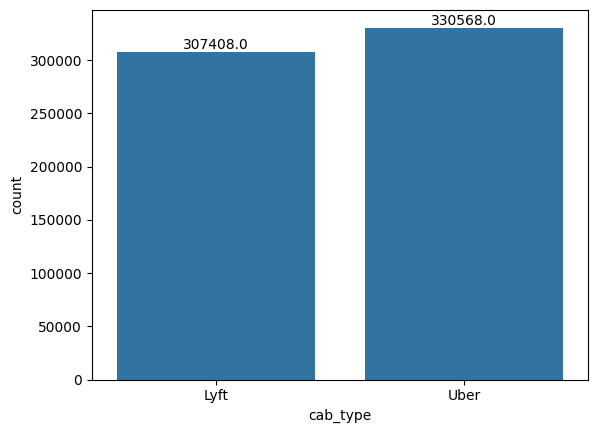

In [6]:
import seaborn as sns

ax = sns.countplot(x="cab_type", data=dataset)
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(y, (x, y), ha="center", va="bottom")

In [7]:
print(dataset[(dataset["y"].isna()) & (dataset["cab_type"] == "Lyft")].shape)
print(dataset[(dataset["y"].isna()) & (dataset["cab_type"] == "Uber")].shape)

(0, 56)
(0, 56)


In [8]:
dataset[["y"]].dropna(axis=0, inplace=True)

/tmp/ipykernel_61320/3641512800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[["y"]].dropna(axis=0, inplace=True)


In [9]:
categorical_columns = dataset.select_dtypes(include="object").columns
numerical_columns = dataset.select_dtypes(exclude="object").columns

print("Categorical Columns")
print(categorical_columns)
print()
print("Numerical Columns")
print(numerical_columns)

Categorical Columns
Index(['timezone', 'source', 'destination', 'cab_type', 'product_id', 'name',
       'short_summary', 'long_summary', 'icon'],
      dtype='object')

Numerical Columns
Index(['timestamp', 'hour', 'day', 'month', 'datetime', 'y', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime',
       'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime',
       'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
  

In [10]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
for column in categorical_columns:
    encoders[column] = LabelEncoder()
    dataset[column] = encoders[column].fit_transform(dataset[column])

dataset.head()

,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,y,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1.544953e+09,9,16,12,2018-12-16 09:30:07,0,5,7,0,7,7,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,4,9,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,5,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,1.543284e+09,2,27,11,2018-11-27 02:00:23,0,5,7,0,11,2,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,8,10,0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,6,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1.543367e+09,1,28,11,2018-11-28 01:00:22,0,5,7,0,6,5,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,0,2,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,1,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,1.543554e+09,4,30,11,2018-11-30 04:53:02,0,5,7,0,9,4,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,0,6,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,1,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,1.543463e+09,3,29,11,2018-11-29 03:49:20,0,5,7,0,10,6,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,6,4,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,5,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [11]:
dataset.dtypes

timestamp                             float64
hour                                    int64
day                                     int64
month                                   int64
datetime                       datetime64[ns]
timezone                                int64
source                                  int64
destination                             int64
cab_type                                int64
product_id                              int64
name                                    int64
y                                     float64
distance                              float64
surge_multiplier                      float64
latitude                              float64
longitude                             float64
temperature                           float64
apparentTemperature                   float64
short_summary                           int64
long_summary                            int64
precipIntensity                       float64
precipProbability                 

In [12]:
dataset.head()

,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,y,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1.544953e+09,9,16,12,2018-12-16 09:30:07,0,5,7,0,7,7,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,4,9,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,5,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,1.543284e+09,2,27,11,2018-11-27 02:00:23,0,5,7,0,11,2,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,8,10,0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,6,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1.543367e+09,1,28,11,2018-11-28 01:00:22,0,5,7,0,6,5,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,0,2,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,1,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,1.543554e+09,4,30,11,2018-11-30 04:53:02,0,5,7,0,9,4,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,0,6,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,1,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,1.543463e+09,3,29,11,2018-11-29 03:49:20,0,5,7,0,10,6,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,6,4,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,5,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [13]:
dataset.describe()

,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,y,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.379760e+05,637976.000000,637976.000000,637976.000000,637976,637976.0,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.00000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,6.379760e+05,637976.000000,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.00000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,6.379760e+05,6.379760e+05,637976.000000,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05
mean,1.544046e+09,11.618528,17.797674,11.586550,2018-12-05 21:34:04.918879488,0.0,5.496768,5.496882,0.518151,5.391096,5.536285,16.545125,2.189261,1.015068,42.338161,-71.066144,39.582406,35.87844,4.260609,4.422260,0.008909,0.145941,0.741056,6.186795,8.470616,1.544049e+09,8.469180,45.039586,1.544050e+09,34.148928,1.544102e+09,41.612514,1.544050e+09,30.137973,1.544099e+09,3.46900,31.652281,1010.092744,220.112705,0.686291,0.249031,8.469180,313.515634,1.544027e+09,1.544060e+09,0.579076,0.037369,1.544044e+09,33.456171,1.544042e+09,45.259945,1.544047e+09,29.729028,1.544048e+09,41.995876,1.544048e+09
min,1.543204e+09,0.000000,1.000000,11.000000,2018-11-26 03:40:46,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.13000,0.000000,0.000000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,0.00000,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,2018-11-28 22:26:08,0.0,3.000000,3.000000,0.000000,2.000000,2.000000,9.000000,1.270000,1.000000,42.350300,-71.081000,36.450000,31.91000,4.000000,2.000000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,2.00000,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,2018-12-02 07:52:59,0.0,5.000000,5.000000,1.000000,5.000000,6.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.90000,5.000000,4.000000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.660000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,4.00000,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.660000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,2018-12-14 22:45:04,0.0,8.000000,8.000000,1.000000,8.000000,9.000000,22.5000

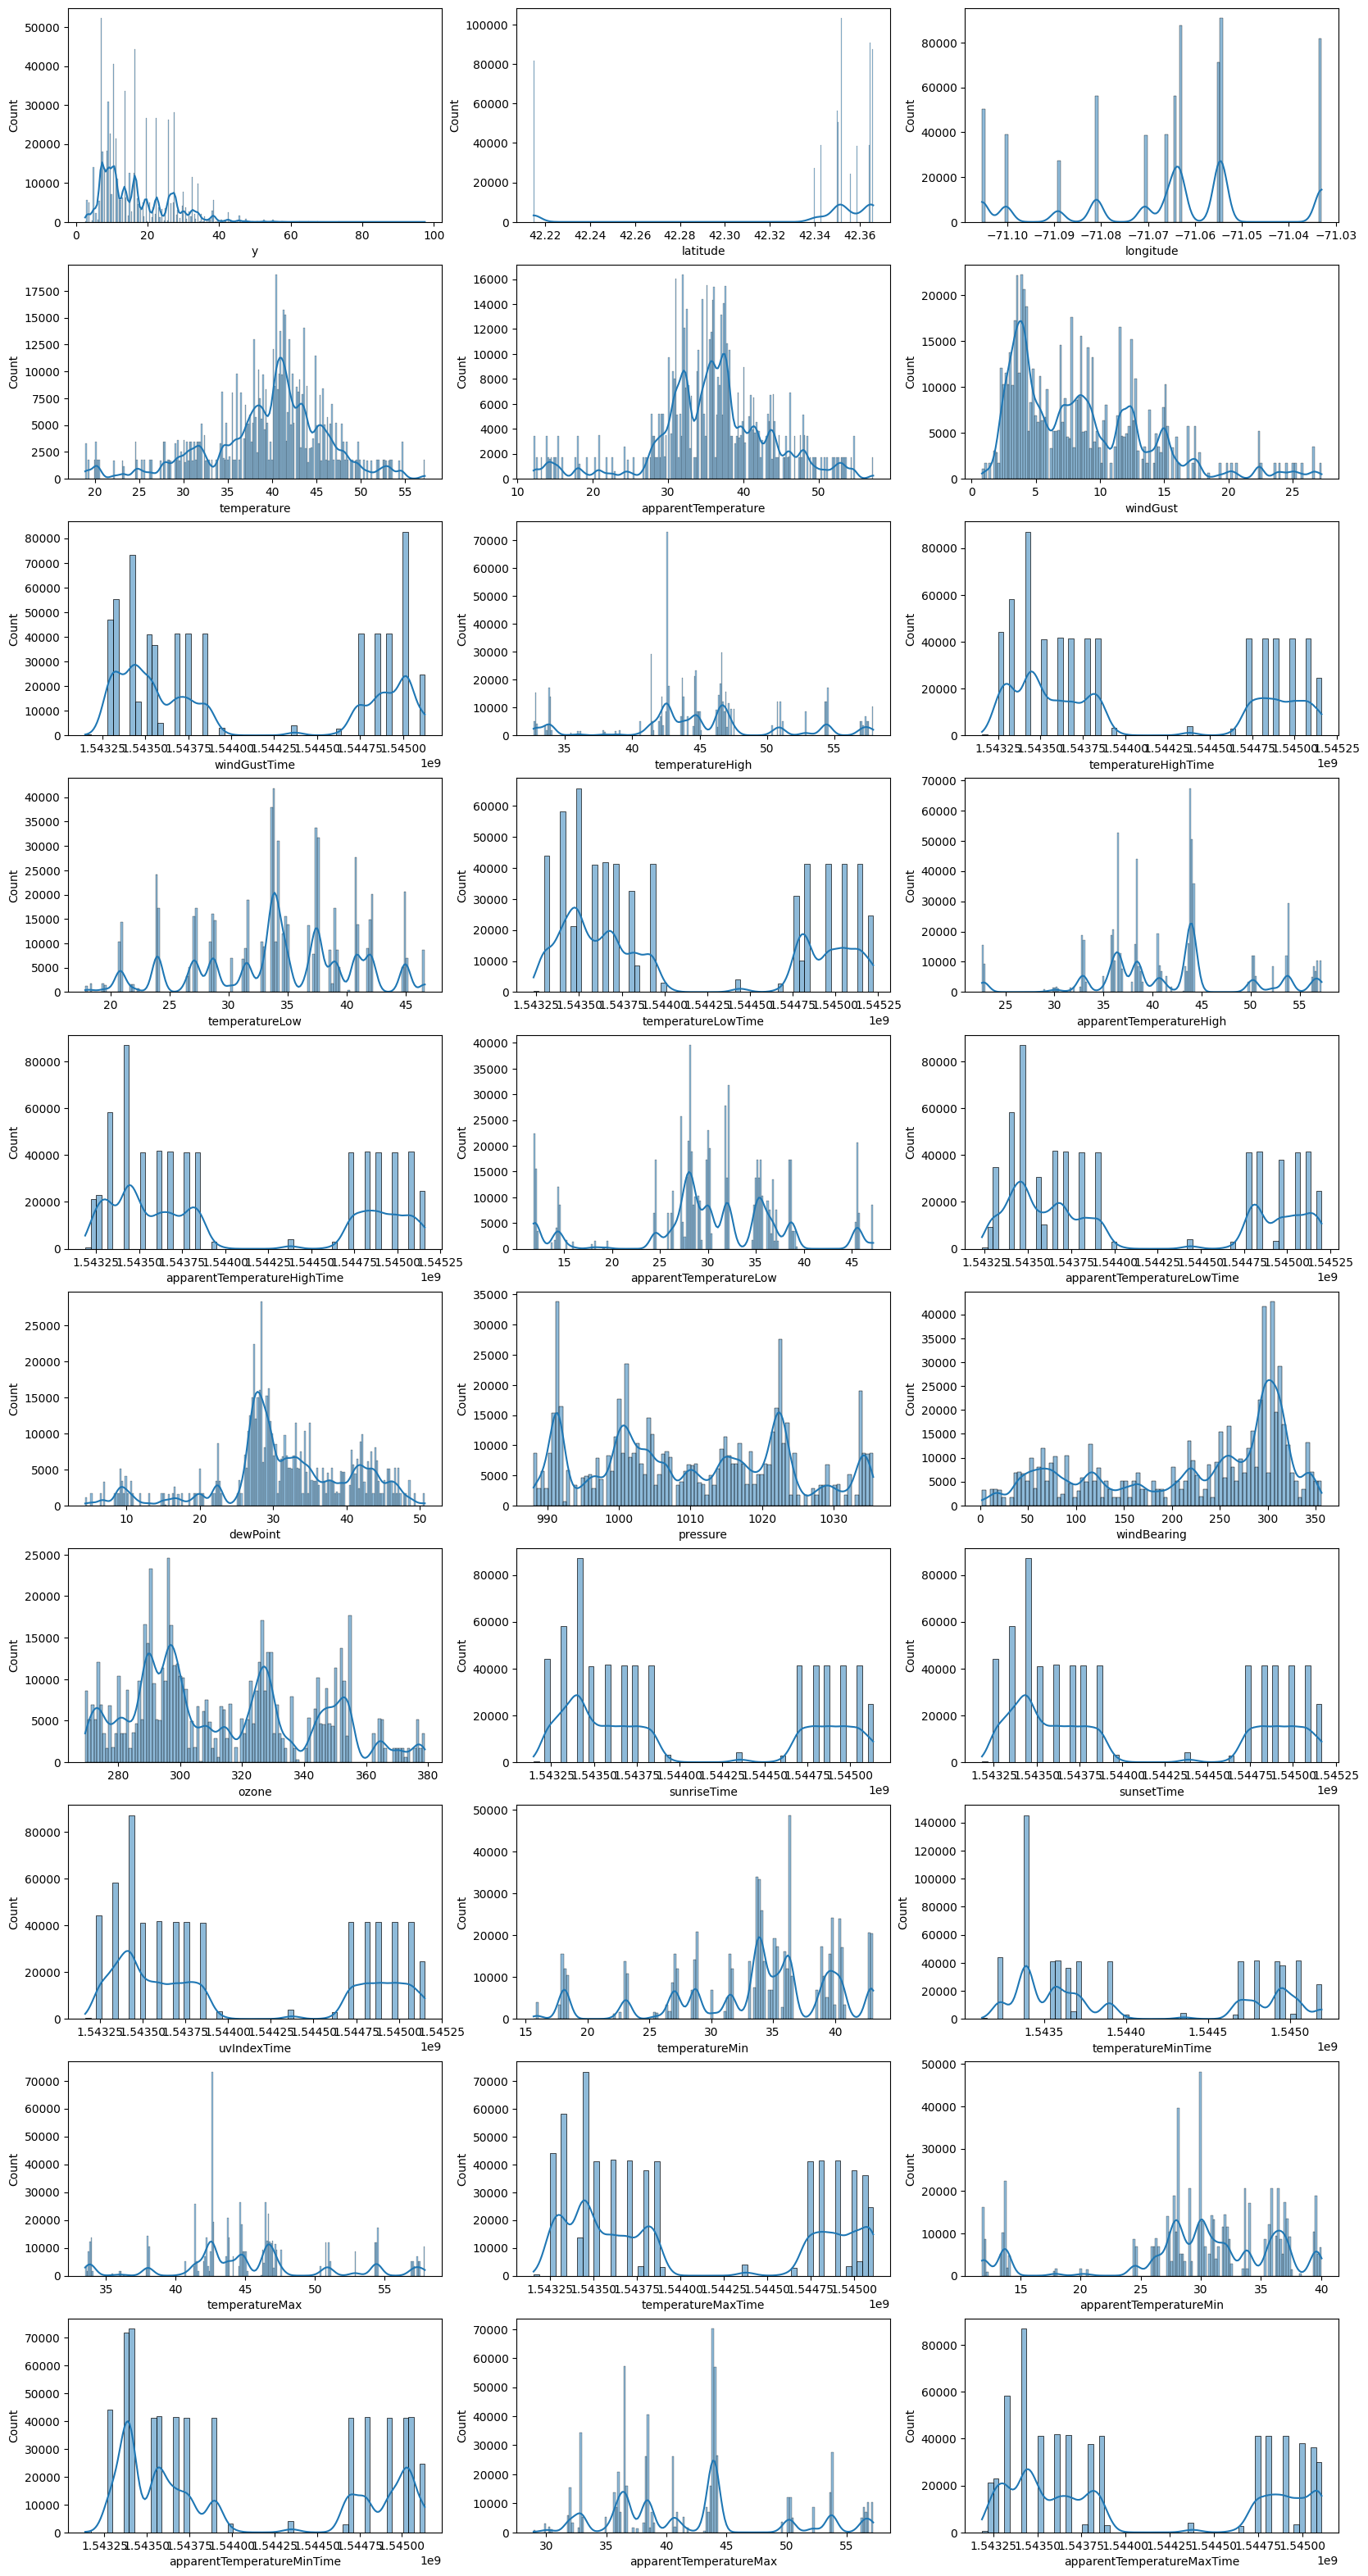

In [14]:
from matplotlib import pyplot as plt

_, axes = plt.subplots(10, 3, figsize=(20, 40), dpi=100)

normalize_columns = [
    "y", "latitude", "longitude", "temperature", "apparentTemperature", "windGust", "windGustTime",
    "temperatureHigh", "temperatureHighTime", "temperatureLow", "temperatureLowTime",
    "apparentTemperatureHigh", "apparentTemperatureHighTime", "apparentTemperatureLow",
    "apparentTemperatureLowTime", "dewPoint", "pressure", "windBearing",
    "ozone", "sunriseTime", "sunsetTime", "uvIndexTime",  "temperatureMin", "temperatureMinTime",
    "temperatureMax", "temperatureMaxTime", "apparentTemperatureMin", "apparentTemperatureMinTime",
    "apparentTemperatureMax", "apparentTemperatureMaxTime"
]
col = 0
row = 0
for column in normalize_columns:
    ax = sns.histplot(x=column, data=dataset, kde=True, ax=axes[col, row])
    col, row = (col+1, 0) if row >= 2 else (col, row+1)

In [15]:
# from sklearn.preprocessing import PowerTransformer

# transform_columns = normalize_columns
# # [
# #     "y", "latitude", "longitude", "windGust", "windGustTime", "temperatureHigh", "temperatureHighTime",
# #     "temperatureLow", "temperatureLowTime", "apparentTemperatureHigh", "apparentTemperatureHighTime",
# #     "apparentTemperatureLow", "apparentTemperatureLowTime", "windBearing", "ozone", "sunriseTime",
# #     "sunsetTime", "uvIndexTime", "temperatureMin", "temperatureMinTime", "temperatureMax", "temperatureMaxTime",
# #     "apparentTemperatureMin", "apparentTemperatureMinTime", "apparentTemperatureMax",
# #     "apparentTemperatureMaxTime",
# #     "temperature", "apparentTemperature", "dewPoint", "pressure"
# # ]
# transformer = PowerTransformer(method="yeo-johnson", standardize=True)
# dataset[transform_columns] = transformer.fit_transform(dataset[transform_columns])

In [16]:
# from matplotlib import pyplot as plt

# _, axes = plt.subplots(10, 3, figsize=(20, 40), dpi=100)

# col = 0
# row = 0
# for column in transform_columns:
#     ax = sns.histplot(x=column, data=dataset, kde=True, ax=axes[col, row])
#     col, row = (col+1, 0) if row >= 2 else (col, row+1)

In [17]:
normalize_with_std_scaler = ["temperature", "apparentTemperature", "dewPoint", "pressure"]
normalize_with_min_max_scaler = [
    "y", "latitude", "longitude", "windGust", "windGustTime", "temperatureHigh", "temperatureHighTime",
    "temperatureLow", "temperatureLowTime", "apparentTemperatureHigh", "apparentTemperatureHighTime",
    "apparentTemperatureLow", "apparentTemperatureLowTime", "windBearing", "ozone", "sunriseTime",
    "sunsetTime", "uvIndexTime", "temperatureMin", "temperatureMinTime", "temperatureMax", "temperatureMaxTime",
    "apparentTemperatureMin", "apparentTemperatureMinTime", "apparentTemperatureMax",
    "apparentTemperatureMaxTime"
]

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

std_scaler = StandardScaler()
dataset[normalize_with_std_scaler] = std_scaler.fit_transform(dataset[normalize_with_std_scaler])

min_max_scaler = MinMaxScaler()
dataset[normalize_with_min_max_scaler] = min_max_scaler.fit_transform(dataset[normalize_with_min_max_scaler])

In [19]:
dataset.describe()

,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,y,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.379760e+05,637976.000000,637976.000000,637976.000000,637976,637976.0,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,6.379760e+05,6.379760e+05,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.00000,6.379760e+05,6.379760e+05,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000
mean,1.544046e+09,11.618528,17.797674,11.586550,2018-12-05 21:34:04.918879488,0.0,5.496768,5.496882,0.518151,5.391096,5.536285,0.147843,2.189261,1.015068,0.815342,0.542210,-3.188430e-16,2.147746e-16,4.260609,4.422260,0.008909,0.145941,0.741056,6.186795,0.290004,0.454362,8.469180,0.490654,0.446548,0.566919,0.437046,0.549234,0.437632,0.517155,0.440093,3.46900,-3.399150e-16,-1.833129e-14,0.616138,0.686291,0.249031,8.469180,0.402883,0.442799,0.442736,0.579076,0.037369,0.443185,0.648932,0.444223,0.482346,0.456733,0.634527,0.456235,0.461801,0.447940
min,1.543204e+09,0.000000,1.000000,11.000000,2018-11-26 03:40:46,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,1.000000,0.000000,0.000000,-3.073738e+00,-2.999581e+00,0.000000,0.000000,0.000000,0.000000,0.380000,0.450000,0.000000,0.000000,0.717000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-2.982293e+00,-1.632788e+00,0.000000,0.000000,0.000000,0.717000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.543444e+09,6.000000,13.000000,11.000000,2018-11-28 22:26:08,0.0,3.000000,3.000000,0.000000,2.000000,2.000000,0.068421,1.270000,1.000000,0.895572,0.337017,-4.657510e-01,-5.012395e-01,4.000000,2.000000,0.000000,0.000000,0.640000,3.410000,0.123251,0.142077,8.432000,0.392616,0.141831,0.428522,0.128623,0.403412,0.127737,0.448363,0.124542,2.00000,-4.553230e-01,-7.623236e-01,0.344633,0.370000,0.000000,8.432000,0.196347,0.130454,0.130395,0.300000,0.000000,0.130199,0.529305,0.133913,0.371921,0.145488,0.564802,0.131532,0.269735,0.131086
50%,1.543737e+09,12.000000,17.000000,12.000000,2018-12-02 07:52:59,0.0,5.000000,5.000000,1.000000,5.000000,6.000000,0.115789,2.160000,1.000000,0.906147,0.584254,1.349483e-01,2.723188e-03,5.000000,4.000000,0.000000,0.000000,0.710000,5.910000,0.255198,0.306011,9.880000,0.475586,0.315978,0.568000,0.293478,0.530075,0.304745,0.514108,0.296703,4.00000,-1.052665e-01,-6.253869e-02,0.723164,0.820000,0.000000,9.880000,0.347032,0.304368,0.304275,0.680000,0.000400,0.305606,0.677466,0.292174,0.457718,0.324125,0.648725,0.304505,0.424779,0.312734
75%,1.544828e+09,18.000000,28.000000,12.000000,2018-12-14 22:45:04,0.0,8.000000,8.000000,1.000000,8.000000,9.000000,0.210526,2.930000,1.000000,0.990747,0.707182,5.943940e-01,5.218426e-01,5.000000,6.000000,0.000000,0.000000,0.880000,8.410000,0.413611,0.857923,9.996000,0.564907,0.827648,0.726261,0.806159,0.

In [20]:
# len(normalize_columns)

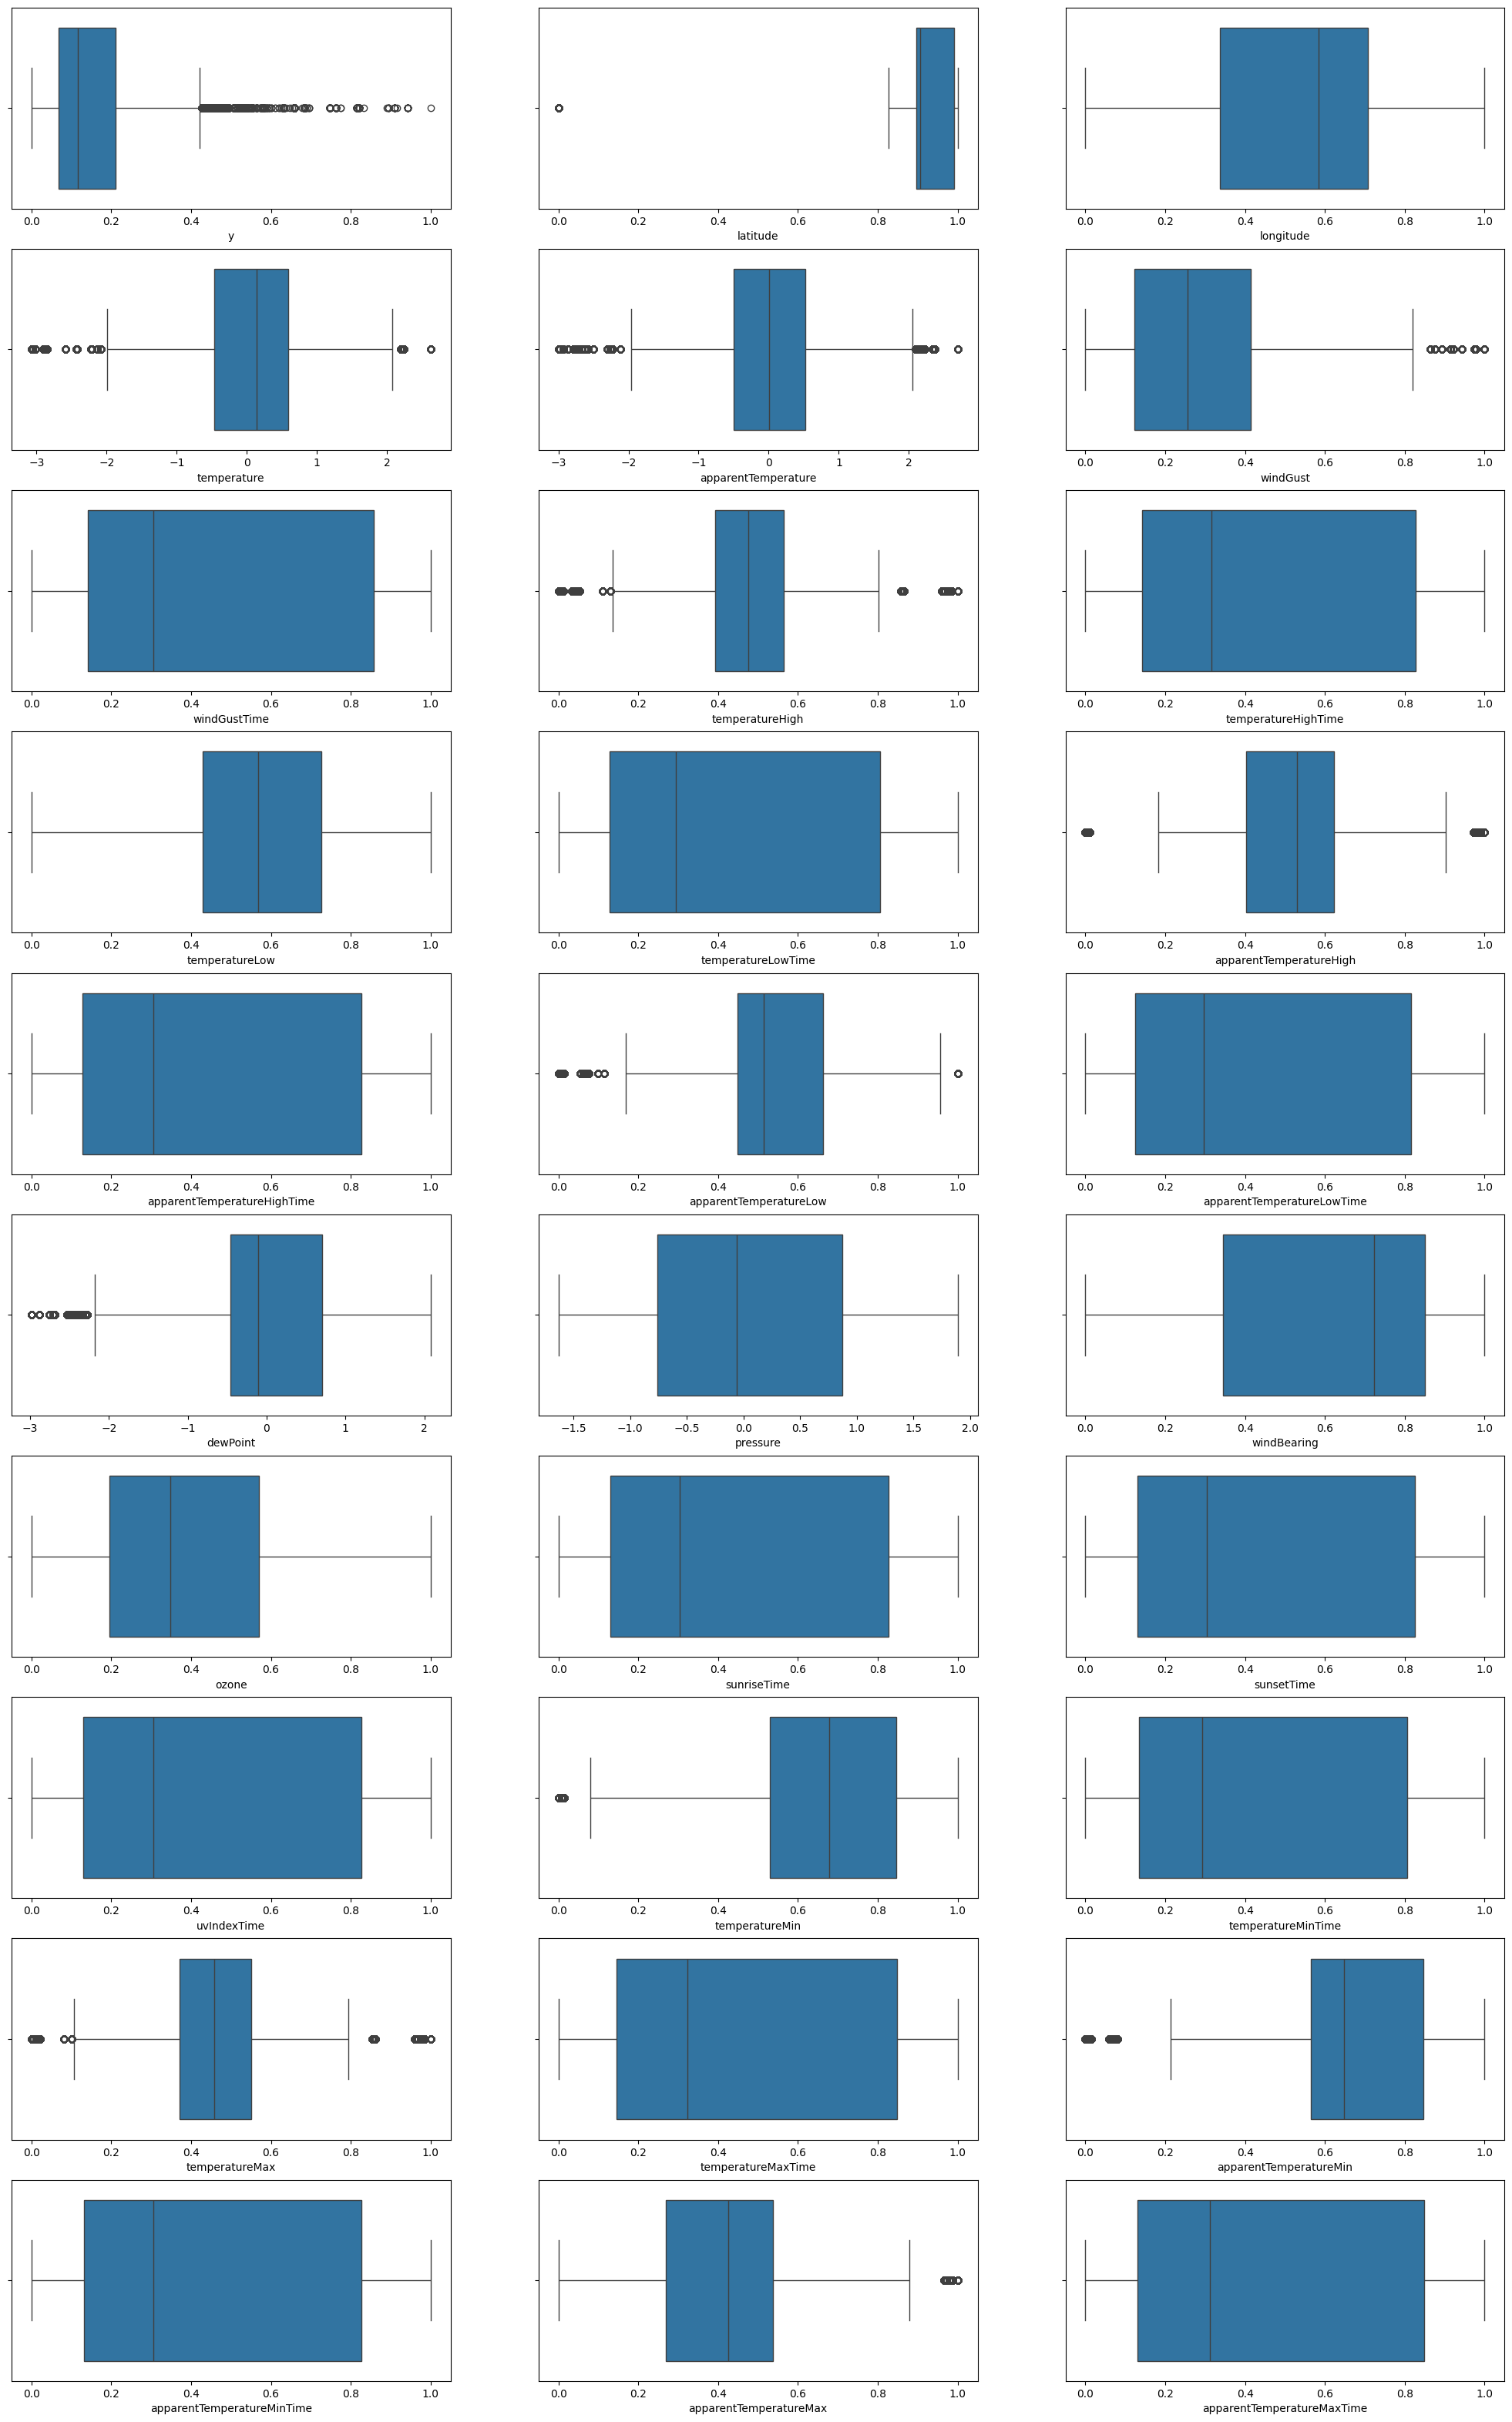

In [21]:
from matplotlib import pyplot as plt

_, axes = plt.subplots(10, 3, figsize=(25, 40), dpi=100)

col = 0
row = 0
for column in normalize_columns:
    _ = sns.boxplot(x=column, data=dataset, ax=axes[col, row])
    col, row = (col+1, 0) if row >= 2 else (col, row+1)

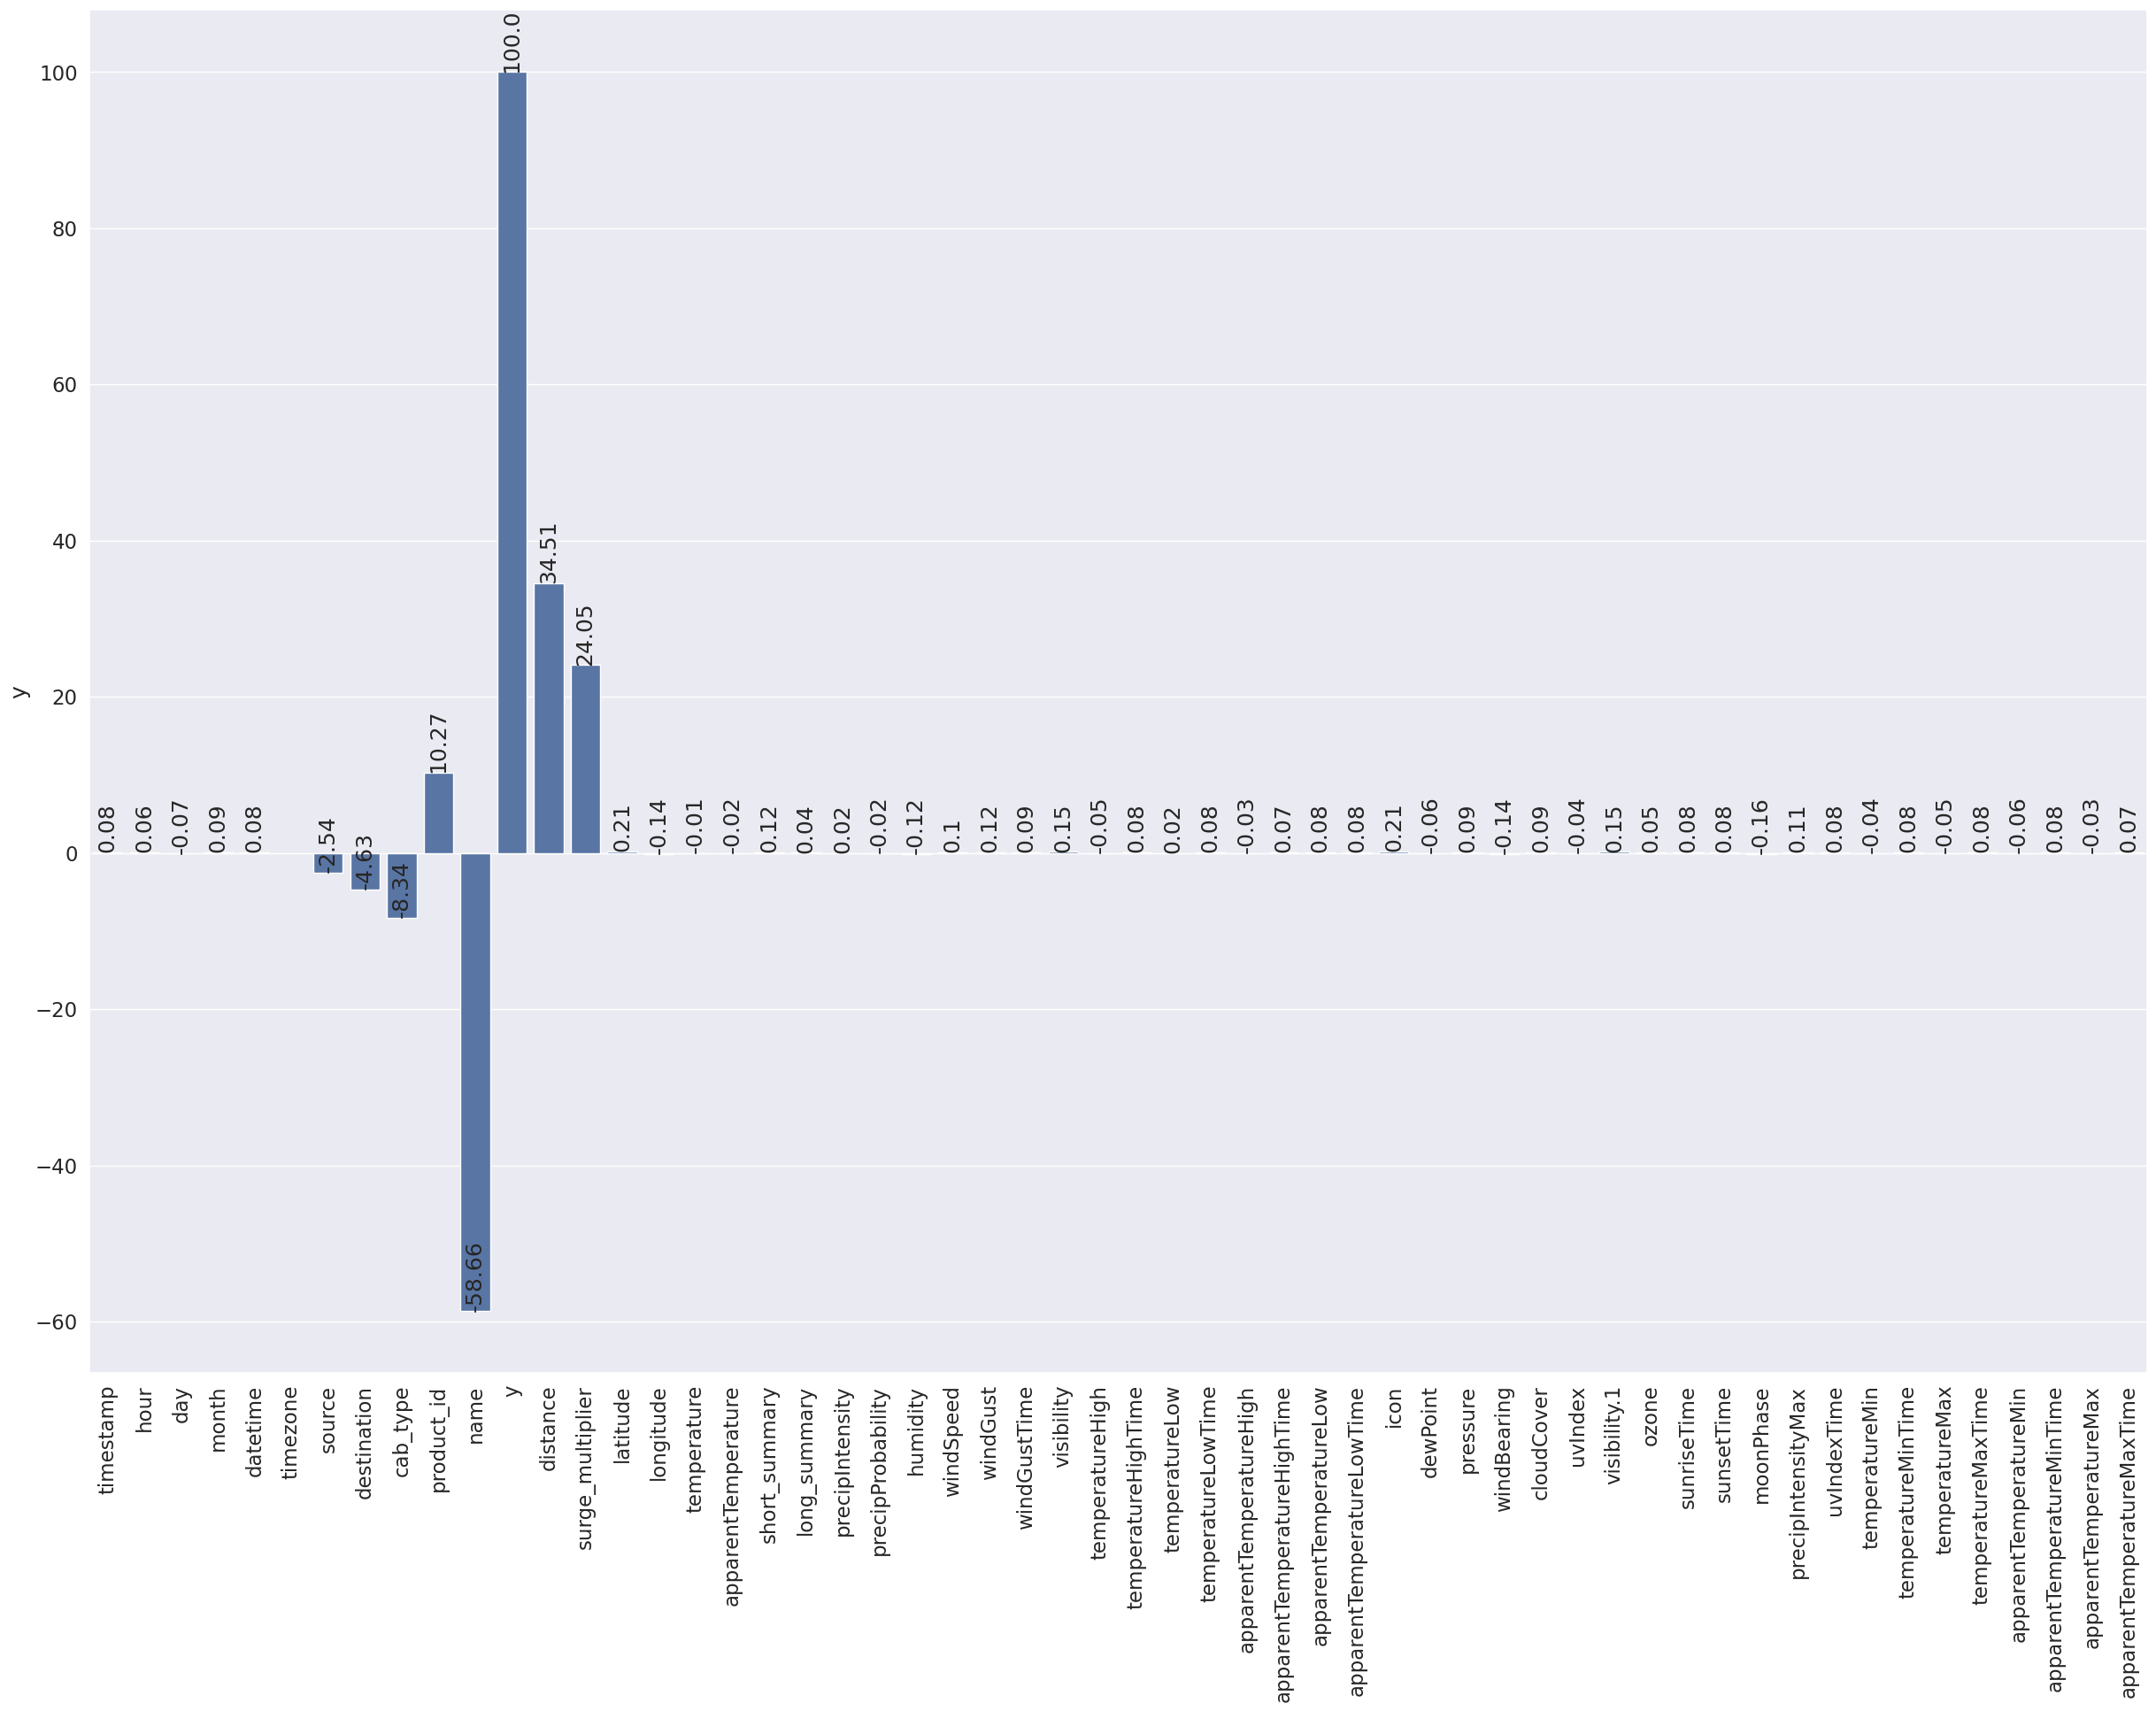

In [22]:
plt.figure(figsize=(30, 20), dpi=100) 
sns.set_theme(font_scale=1.5)

corr_map = dataset.corr()["y"] * 100
ax = sns.barplot(corr_map)
plt.xticks(rotation=90)
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(round(y, 2), (x, y), ha="center", va="bottom", rotation=90)

In [23]:
all_column_names = dataset.columns.tolist()
imp_columns = corr_map[(corr_map > 0.5) | (corr_map < -0.5)]
print(imp_columns)

for col_name in all_column_names:
    if col_name not in imp_columns:
        dataset.drop(columns=col_name, axis=1, inplace=True)

dataset.head()

source               -2.536608
destination          -4.631964
cab_type             -8.338528
product_id           10.267931
name                -58.664377
y                   100.000000
distance             34.506107
surge_multiplier     24.045813
Name: y, dtype: float64


,source,destination,cab_type,product_id,name,y,distance,surge_multiplier
0,5,7,0,7,7,0.026316,0.44,1.0
1,5,7,0,11,2,0.089474,0.44,1.0
2,5,7,0,6,5,0.047368,0.44,1.0
3,5,7,0,9,4,0.247368,0.44,1.0
4,5,7,0,10,6,0.068421,0.44,1.0


In [24]:
# import numpy as np

# # Feature Engineering for Datetime
# dataset['year'] = dataset['datetime'].dt.year
# dataset['month'] = dataset['datetime'].dt.month
# dataset['day'] = dataset['datetime'].dt.day
# dataset['dayofweek'] = dataset['datetime'].dt.dayofweek  # Monday=0, Sunday=6
# dataset['hour'] = dataset['datetime'].dt.hour
# dataset['minute'] = dataset['datetime'].dt.minute

# # Cyclical Features (Important for time-based data)
# dataset['month_sin'] = np.sin(2 * np.pi * dataset['month'] / 12)
# dataset['month_cos'] = np.cos(2 * np.pi * dataset['month'] / 12)
# dataset['dayofweek_sin'] = np.sin(2 * np.pi * dataset['dayofweek'] / 7)
# dataset['dayofweek_cos'] = np.cos(2 * np.pi * dataset['dayofweek'] / 7)
# dataset['hour_sin'] = np.sin(2 * np.pi * dataset['hour'] / 24)
# dataset['hour_cos'] = np.cos(2 * np.pi * dataset['hour'] / 24)

In [25]:
# dataset = dataset.drop(columns=["datetime"], axis=1)

In [26]:
from sklearn.model_selection import train_test_split

X = dataset.drop(columns=["y"], axis=1, inplace=False)
y = dataset[["y"]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"Train dataset size: {X_train.shape[0]}")
print(f"Test dataset size: {X_test.shape[0]}")

Train dataset size: 510380
Test dataset size: 127596


In [27]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=50, criterion="poisson",
    max_depth=10, max_features=X_train.shape[1],  # "sqrt", "log2"
    bootstrap=True, oob_score=True, n_jobs=-1,
    random_state=42, verbose=0
)
model.fit(X_train, y_train)

/home/parth/miniconda3/envs/env-practice-ml-py310/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(criterion='poisson', max_depth=10, max_features=7,
                      n_estimators=50, n_jobs=-1, oob_score=True,
                      random_state=42)

In [28]:
model.score(X_test, y_test)

0.9664681173574515

In [29]:
for f_name, f_imp in zip(
    model.feature_names_in_, model.feature_importances_
):
    print(f"{f_name}: {f_imp:.4f}")

source: 0.0011
destination: 0.0014
cab_type: 0.0001
product_id: 0.1624
name: 0.6750
distance: 0.1358
surge_multiplier: 0.0242


In [30]:
from sklearn.metrics import r2_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
print(f"Train R2 Score: {train_r2}")

test_r2 = r2_score(y_test, y_test_pred)
print(f"Test R2 Score: {test_r2}")

Train R2 Score: 0.9665488432215484
Test R2 Score: 0.9664681173574515


In [31]:
def adjusted_r2(r2, n, p):
    return 1 - (((1 - r2) * (n - 1)) / (n - p - 1))

train_adj_r2 = adjusted_r2(train_r2, len(y_train), X_train.shape[1])
print(f"Train Adjusted R2 Score: {train_adj_r2}")

test_adj_r2 = adjusted_r2(test_r2, len(y_test), X_test.shape[1])
print(f"Test Adjusted R2 Score: {test_adj_r2}")

Train Adjusted R2 Score: 0.9665483844226773
Test Adjusted R2 Score: 0.9664662776610968


In [32]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_train_pred)
print(f"Train dataset Mean Squared Error: {train_mse}")

test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test dataset Mean Squared Error: {test_mse}")

Train dataset Mean Squared Error: 0.00032203660172314456
Test dataset Mean Squared Error: 0.0003239139833012219


In [33]:
y_test[y_test["y"] == 0.0].shape

(47, 1)

In [34]:
from sklearn.metrics import mean_absolute_percentage_error

non_zero_X_test = X_test[y_test["y"] != 0.0]
non_zero_y_test = y_test[y_test["y"] != 0.0]
non_zero_y_test_pred = model.predict(non_zero_X_test)

mape = mean_absolute_percentage_error(non_zero_y_test, non_zero_y_test_pred)
print(f"Test dataset Mean Absolute Percentage Error: {mape}")

Test dataset Mean Absolute Percentage Error: 0.14392072727884464
